In [2]:
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves
import pandas as pd

In [3]:
df = pd.DataFrame({'a':[1,2,3],'b':[4,5,6],'c':[7,8,9]})
df.index = ['i1','i2','i3']
print(df)
print(df.loc['i1','a'])
df1 = pd.DataFrame(columns=['a','b','c'],index=['i3','i5'])
print(df.append(df1))
idx2 = df1.index
idx = df.index
print(df)

    a  b  c
i1  1  4  7
i2  2  5  8
i3  3  6  9
1
      a    b    c
i1    1    4    7
i2    2    5    8
i3    3    6    9
i3  NaN  NaN  NaN
i5  NaN  NaN  NaN
    a  b  c
i1  1  4  7
i2  2  5  8
i3  3  6  9


In [5]:
df.append(['x','x','x'],ignore_index=True)

,a,b,c,0
0,1.0,4.0,7.0,NaN
1,2.0,5.0,8.0,NaN
2,3.0,6.0,9.0,NaN
3,NaN,NaN,NaN,x
4,NaN,NaN,NaN,x
5,NaN,NaN,NaN,x


In [35]:
df_temp = pd.DataFrame(columns=['a','b','c'])
df_temp['a'] = [11,12,13]
df_temp['b'] = [21,22,23]
df_temp['c'] = [31,32,33]
print(df.append(df_temp))
print(df)
df = df.append({'a':0,'b':0,'c':0},ignore_index=True)
df.sort_values(by=['a','b'])

    a   b   c
0   1   4   7
1   2   5   8
2   3   6   9
3   0   0   0
4   0   0   0
0  11  21  31
1  12  22  32
2  13  23  33
   a  b  c
0  1  4  7
1  2  5  8
2  3  6  9
3  0  0  0
4  0  0  0


,a,b,c
3,0,0,0
4,0,0,0
5,0,0,0
0,1,4,7
1,2,5,8
2,3,6,9


In [34]:
dic = {'a':[1,2,3],'b':[4,5,6],'c':[7,8,9],'d':[0,0,0]}
len(dic)
for k,v in dic.items():
    print(k,v)
dic = {}
for k,v in dic.items():
    print(k,v)


a [1, 2, 3]
b [4, 5, 6]
c [7, 8, 9]
d [0, 0, 0]


True

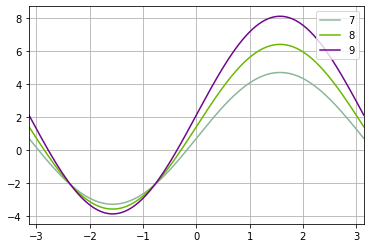

In [3]:
plt.figure()
andrews_curves(df, "c");

In [21]:
M=100
N=40
filepath = 'repository/model_repository_'+str(M)+'_'+str(N)+'.csv'
df = pd.read_csv(filepath,index_col=0)
print('M:',len(df))
print('N:',len(df.columns))
print(df.head())

M: 100
N: 41
           T0        T1        T2        T4        T6        T3        T5  T7  \
M2   0.729942  0.789525  0.803578  0.900116  0.805680       NaN       NaN NaN   
M10  0.765541  0.939080       NaN       NaN       NaN  0.853315  0.722549 NaN   
M0   0.704680  0.788518  0.921513  0.774818  0.932334  0.772609  0.925858 NaN   
M1   0.911750  0.955222       NaN       NaN  0.957778  0.720577  0.775450 NaN   
M3   0.901230  0.716891  0.776634       NaN       NaN  0.753253       NaN NaN   

     T8  T9  ...  T31  T32  T33  T34  T35  T37  T36  T38  T39       cost  
M2  NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  77.018779  
M10 NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  76.685057  
M0  NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  63.245929  
M1  NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  67.166774  
M3  NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  71.184576  

[5 rows x 41 columns]


In [37]:
from operator import itemgetter, attrgetter
import numpy as np
import time


def TwoDimensionsNP(data):
    data_np = data.to_numpy()
    index = list(data.index)
    
    sorted_data = sorted(data_np, key=itemgetter(0, 1), reverse=True)
    pareto_idx = list()
    pareto_idx.append(1)
    cutt_off = sorted_data[0][1]
    for i in range(1, len(sorted_data)):
        if sorted_data[i][1] > cutt_off:
            pareto_idx.append(1)
            cutt_off = sorted_data[i][1]
        else: pareto_idx.append(0)
    return pareto_idx

data = df.loc[:,['T2','cost']]
data.dropna(inplace=True)
print(data)

fig, ax = plt.subplots()
ax.scatter(df['cost'], df['T2'])
plt.show()

pareto_idx = TwoDimensionsNP(data)
data['pareto'] = pareto_idx
data

KeyError: "None of [Index(['T2', 'cost'], dtype='object')] are in the [columns]"

{'M0': 1, 'M1': 1}


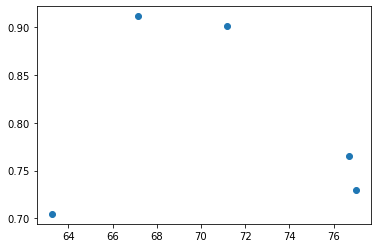

In [23]:
def TwoDimensionsPD(data,taskName):
    map_dict = {}
#     columns = list(data.columns)[::-1]
    
    sorted_data = data.sort_values(by='cost')
    index = list(sorted_data.index)

    map_dict[index[0]] = 1
    cutt_off = sorted_data[taskName][0]
    for i in range(1, len(sorted_data)):
        if sorted_data[taskName][i] > cutt_off:
            cutt_off = sorted_data[taskName][i]
            map_dict[index[i]] = 1
    return map_dict

data = df.loc[:,['T0','cost']]
data.dropna(inplace=True)
# print(data)

map_dict = TwoDimensionsPD(data,'T0')
print(map_dict)

fig, ax = plt.subplots()
ax.scatter(df['cost'], df['T0'])
plt.show()


In [24]:
map_dict = {}
columns = list(df.columns)[:-1]
for c in columns:
    data = df.loc[:,[c,'cost']]
    data = data.dropna()
    map_dict[c] = {}
    map_dict[c] = TwoDimensionsPD(data,c)
len(map_dict)

40

In [25]:
df_pareto = pd.DataFrame.from_dict(map_dict, orient='index')
df_pareto = df_pareto.T
df_pareto.fillna(0)

,T0,T1,T2,T6,T5,T4,T3,T7,T8,T11,...,T31,T30,T32,T33,T35,T36,T37,T38,T39,T34
M0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M18,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M14,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M6,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M11,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M19,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


['T0', 'T1', 'T2', 'T4']


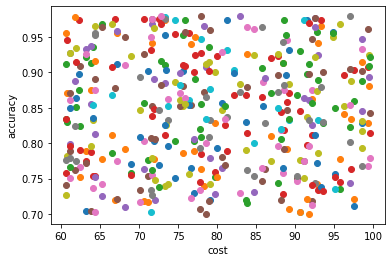

In [26]:
from pandas.plotting import scatter_matrix

columns = list(df.columns)[:-1]
print(columns[:4])
fig, ax = plt.subplots()
for c in columns:
    ax.scatter(df['cost'], df[c])
plt.xlabel("cost")
plt.ylabel('accuracy')
plt.show()

In [29]:
def getData(df,M,N,query_range):
    df_summary = df.loc[df['M']==M]
    df_summary = df_summary.loc[df['N']==N]
    print(df_summary.head())
    data = [df_summary.loc[df_summary['#query'] == n,'ratio'] for n in query_range]
    return data

path = 'repository/model_pareto_summary.csv'
df_summary = pd.read_csv(path,index_col=0)
query_range = [50,100,150,200]
M=100
N=40
data = getData(df_summary,M,N,query_range)

       M     N  #query  #predicates  #pareto   ratio
0  100.0  40.0    50.0         40.0     39.0  0.9750
1  100.0  40.0    50.0         48.0     46.0  0.9583
2  100.0  40.0    50.0         46.0     44.0  0.9565
3  100.0  40.0    50.0         37.0     35.0  0.9459
4  100.0  40.0    50.0         44.0     44.0  1.0000


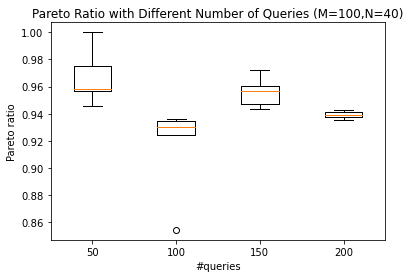

In [30]:
fig, ax = plt.subplots()
ax.set_title('Pareto Ratio with Different Number of Queries (M='+str(M)+',N='+str(N)+')')
ax.boxplot(data)
plt.xticks(range(1,len(data)+1), query_range)
plt.xlabel("#queries")
plt.ylabel("Pareto ratio")
plt.show()

In [21]:
range(1,len(data))

range(1, 4)